# Comparison of common Machine Learning Algorithms considering a sport activities Classification Task

Even if Deep Learning is continuosly growing in terms of importance, classical Machine Learning technquis still represent a cornerstone for people who approach computer science for the first time. There are loads of different techniques, some of them are specifically devoted to tackle given types of problems; some others are instead multi-porpose.

One popular task is the so called *classification problem*, where the model’s output is a category with a semantic meaning. A classification model attempts to draw some conclusion from observed values.
Different methods can be implemented to tackle this problem.

Our focus is a brief comparative study over four different machine learning supervised techniques:
1. Logistic Regression
2. K Nearest Neighbors
3. Decision Trees
4. Multilayer Perceptron

## Dataset Description

The choosen [dataset](https://archive-beta.ics.uci.edu/ml/datasets/daily+and+sports+activities) comprises motion sensor data of 19 daily and sports activities performed by 8 subjects (between 20 and 30 years old) *in their own style* for 5 minutes. Five Xsens MTx units are used on the torso, arms, and legs. This kind of sensor embeds a gyroscope, an accelerometer and a magnetometer.

Since activities are perfomed as the subject desires, there might be inter-subject variations in the speeds and amplitudes of some activities.

The 19 activities are:

 1 &rarr; sitting

 2 &rarr; standing

 3 &rarr; lying on back

 4 &rarr; laying on right side

 5 &rarr; ascending stairs

 6 &rarr; descending stairs

 7 &rarr; standing in an elevator still

 8 &rarr; moving around in an elevator

 9 &rarr; walking in a parking lot
 
 10 &rarr; walking on a treadmill with a speed of 4 km/h on flat
 
 11 &rarr; walking on a treadmill with a speed of 4 km/h on a 15 deg inclined ositions
 
 12 &rarr; running on a treadmill with a speed of 8 km/h
 
 13 &rarr; exercising on a stepper
 
 14 &rarr; exercising on a cross trainer
 
 15 &rarr; cycling on an exercise bike in horizontal position
 
 16 &rarr; cycling on an exercise bike in vertical positions
 
 17 &rarr; rowing
 
 18 &rarr; jumping
 
 19 &rarr; playing basketball

The dataset contains 9120 measurements from body sensors and class labels for 19 different physical activities.
The data are structured so that each file represents a set of measurement samples in a 5s window for each combination of participant and activity (so there are 60 such files for each of these combinations). There are 125 samples in each file, containing values from 45 sensors. The participant and the activity are given by the directory path leading to the file.

The **expected outcome** of each model is a class label that ranges from 1 to 19 that can be easily relted to the activited listed before.

## Pre-processing

Since the dataset used for this study is organised in folders and subfolders according to a hierarchical scheme, a quick preprocessing operation aimed to creade a huge database is necessary. The idea is to extract the files from each folder and stack them together in a single CSV file.

In [1]:
import pandas as pd
import numpy as np

The structure is organised in 19 folder (one for each activity), each one containing 8 folder (one for each person), again containing 60 text files (each represents 5 sec of sampling). Therefore, some indexes are initilized to refer to each of the aforementioned elements.

In [2]:
file_index = ["%02d" % x for x in range(1,61)]
person_index = ["%01d" % x for x in range(1,9)]
activity_index = ["%02d" % x for x in range(1,20)]

Each file representing 5 sec sampling contains 125 rows (sampling frequency of 25Hz), hence for gain some representative values of those 5 sec time span, the average and the variance of all the recorder values are computed and combined into a single array. In this way, there are now 60 arrays for each person and activity which can be joined together. In addition, in the last column, the index of the acitivy, which ranges from 1 up to 19, is added.
To clearly undestand the final CSV file, the headers of each column are implemented as follows.

In [3]:
dataset_header = ["T_xacc", "T_yacc", "T_zacc", "T_xgyro", "T_ygyro", "T_zgyro", "T_xmag", "T_ymag", "T_zmag",
        "RA_xacc", "RA_yacc", "RA_zacc", "RA_xgyro", "RA_ygyro", "RA_zgyro", "RA_xmag", "RA_ymag", "RA_zmag",
        "LA_xacc", "LA_yacc", "LA_zacc", "LA_xgyro", "LA_ygyro", "LA_zgyro", "LA_xmag", "LA_ymag", "LA_zmag",
        "RL_xacc", "RL_yacc", "RL_zacc", "RL_xgyro", "RL_ygyro", "RL_zgyro", "RL_xmag", "RL_ymag", "RL_zmag",
        "LL_xacc", "LL_yacc", "LL_zacc", "LL_xgyro", "LL_ygyro", "LL_zgyro", "LL_xmag", "LL_ymag", "LL_zmag",
        "var_T_xacc", "var_T_yacc", "var_T_zacc", "var_T_xgyro", "var_T_ygyro", "var_T_zgyro", "var_T_xmag", "var_T_ymag", "var_T_zmag",
        "var_RA_xacc", "var_RA_yacc", "var_RA_zacc", "var_RA_xgyro", "var_RA_ygyro", "var_RA_zgyro", "var_RA_xmag", "var_RA_ymag", "var_RA_zmag",
        "var_LA_xacc", "var_LA_yacc", "var_LA_zacc", "var_LA_xgyro", "var_LA_ygyro", "var_LA_zgyro", "var_LA_xmag", "var_LA_ymag", "var_LA_zmag",
        "var_RL_xacc", "var_RL_yacc", "var_RL_zacc", "var_RL_xgyro", "var_RL_ygyro", "var_RL_zgyro", "var_RL_xmag", "var_RL_ymag", "var_RL_zmag",
        "var_LL_xacc", "var_LL_yacc", "var_LL_zacc", "var_LL_xgyro", "var_LL_ygyro", "var_LL_zgyro", "var_LL_xmag", "var_LL_ymag", "var_LL_zmag",
        "activity_index"]

The entire dataset is made of 9120 arrays containing 91 elements: 3 senosors measuring along 3 different axis for 5 sensing locations, then 45 variance vlaues, plus the acitivity index at the end. To extract and collect all the data, a set of nested for loops is used.

In [4]:
# Create the entire dataset: 9120 x 91
# Person from 1 to 8
all_activities = []
print("Importing all data")
for k in range(19):
    print("Elaborating activity number: ", activity_index[k])
    for j in range(8):
        print("Elaborating person number: ", person_index[j], end = "\r")
        for i in range(60):
            filename = f"./sports_dataset/a{activity_index[k]}/p{person_index[j]}/s{file_index[i]}.txt"

            data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=float)
            data_t = data.transpose()
            average = np.mean(data_t, axis = 1)
            variance = np.var(data_t, axis = 1)
            
            index = np.array([int(activity_index[k])])
            new_data = np.concatenate((average, variance, index), axis = None)
            
            all_activities.append(new_data)

print("\nData correctly stored")

activities_dataset = np.array(all_activities)
np.savetxt("./sports_dataset/activities_dataset.csv", activities_dataset, delimiter=",", header = ','.join(dataset_header), comments='')
print("Activity dataset created\n")

Importing all data
Elaborating activity number:  01
Elaborating activity number:  02
Elaborating activity number:  03
Elaborating activity number:  04
Elaborating activity number:  05
Elaborating activity number:  06
Elaborating activity number:  07
Elaborating activity number:  08
Elaborating activity number:  09
Elaborating activity number:  10
Elaborating activity number:  11
Elaborating activity number:  12
Elaborating activity number:  13
Elaborating activity number:  14
Elaborating activity number:  15
Elaborating activity number:  16
Elaborating activity number:  17
Elaborating activity number:  18
Elaborating activity number:  19
Elaborating person number:  8
Data correctly stored
Activity dataset created



For training all the models, a specific dataset is created considering the data of the first 7 people. A similar approach is the used for its creation.

In [5]:
# Create the train dataset: 7980 x 91
# Person from 1 to 7
training_activities = []
print("Importing training data")
for k in range(19):
    print("Elaborating activity number: ", activity_index[k])
    for j in range(7):
        print("Elaborating person number: ", person_index[j], end = "\r")
        for i in range(60):
            filename = f"./sports_dataset/a{activity_index[k]}/p{person_index[j]}/s{file_index[i]}.txt"

            data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=float)
            data_t = data.transpose()
            average = np.mean(data_t, axis = 1)
            variance = np.var(data_t, axis = 1)
            
            index = np.array([int(activity_index[k])])
            new_data = np.concatenate((average, variance, index), axis = None)
            
            training_activities.append(new_data)

print("\nTraining data correctly stored")

activities_train_dataset = np.array(training_activities)
np.savetxt("./sports_dataset/training_dataset.csv", activities_train_dataset, delimiter=",", header = ','.join(dataset_header), comments='')
print("Training dataset created\n")

Importing training data
Elaborating activity number:  01
Elaborating activity number:  02
Elaborating activity number:  03
Elaborating activity number:  04
Elaborating activity number:  05
Elaborating activity number:  06
Elaborating activity number:  07
Elaborating activity number:  08
Elaborating activity number:  09
Elaborating activity number:  10
Elaborating activity number:  11
Elaborating activity number:  12
Elaborating activity number:  13
Elaborating activity number:  14
Elaborating activity number:  15
Elaborating activity number:  16
Elaborating activity number:  17
Elaborating activity number:  18
Elaborating activity number:  19
Elaborating person number:  7
Training data correctly stored
Training dataset created



While for training all the models, the data regarding the 8th person are used instead.

In [6]:
# Create the test dataset: 1140 x 91
# Person 8
testing_activities = []
print("Importing testing data")
for k in range(19):
    print("Elaborating activity number: ", activity_index[k])
    print("Elaborating person number: ", person_index[7], end = "\r")
    for i in range(60):
        filename = './sports_dataset/a' + activity_index[k] + '/p'+ person_index[7] + '/s' + file_index[i] + '.txt'

        data = np.loadtxt(filename, delimiter=',', skiprows=1, dtype=float)
        data_t = data.transpose()            
        average = np.mean(data_t, axis = 1)
        variance = np.var(data_t, axis = 1)
        
        index = np.array([int(activity_index[k])])
        new_data = np.concatenate((average, variance, index), axis = None)
        
        testing_activities.append(new_data)

print("\nTesting data correctly stored")

activities_test_dataset = np.array(testing_activities)
np.savetxt("./sports_dataset/test_dataset.csv", activities_test_dataset, delimiter=",", header = ','.join(dataset_header), comments='')
print("Testing dataset created\n")

Importing testing data
Elaborating activity number:  01
Elaborating activity number:  02
Elaborating activity number:  03
Elaborating activity number:  04
Elaborating activity number:  05
Elaborating activity number:  06
Elaborating activity number:  07
Elaborating activity number:  08
Elaborating activity number:  09
Elaborating activity number:  10
Elaborating activity number:  11
Elaborating activity number:  12
Elaborating activity number:  13
Elaborating activity number:  14
Elaborating activity number:  15
Elaborating activity number:  16
Elaborating activity number:  17
Elaborating activity number:  18
Elaborating activity number:  19
Elaborating person number:  8
Testing data correctly stored
Testing dataset created



Now, all the necessary databases are saved as CSV files and ready to feed the models.

To compare at the end the different models, some performance indexes will be stored during model's operation. Those will be saved into the following empyt lists.

In [123]:
totalAccuracy = []
totalTrainTime = []
totalTestTime = []
totalF1ScoreWeighted = []

## Logistic Regression

Logistic regression is the right algorithm to start with classification algorithms. Even though, the name ‘Regression’ comes up, it is not a regression model, but a classification model. It uses a logistic function to frame binary output model. The output of the logistic regression will be a probability (0≤x≤1), and can be used to predict the binary 0 or 1 as the output ( if x<0.5, output= 0, else output=1).

**Loss function**

We use **cross entropy** as our loss function. The basic logic here is that, whenever my prediction is badly wrong, (eg : y’ =1 & y = 0), cost will be -log(0) which is infinity.

**Advantages**
- Easy, fast and simple classification method.
- θ parameters explains the direction and intensity of significance of independent variables over the dependent variable.
- Can be used for multiclass classifications also.
- Loss function is always convex.

**Disadvantages**
- Cannot be applied on non-linear classification problems.
- Proper selection of features is required.
- Good signal to noise ratio is expected.
- Colinearity and outliers tampers the accuracy of LR model.

**Hyperparameters**
Logistic regression hyperparameters are mainly two: Learning rate(α) and Regularization parameter(λ). Those have to be tuned properly to achieve high accuracy.

Firstly, some general purpose libraries are imported to manage and load the databases.

In [111]:
import time
import numpy as np
import os.path
import sys
import matplotlib.pyplot as plt

Then, from the Scikit Learn library, the algorithm and some evaluation tools are imported.

In [112]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

Since some functions are repeated, those are collected in an header file called *utils*, which is then imported in the main code. Those are in principle secondary functions for data management and plotting, they will be not shown in details in this notebook.

In [113]:
from models.utils import utils

Once all the libraries are load, the databases are imported too.

In [114]:
print("Importing data ...")

train_data_input, train_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/training_dataset.csv")
    )
test_data_input, test_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/test_dataset.csv")
    )
print("Data imported")

Importing data ...
Data imported


Before making any actual predictions, it is always a good practice to scale the features so that all of them can be uniformly evaluated.

The scaling is fit with the train data so that the train data remain unknown and unseen till the testing phase.

In [115]:
print("Scaling data ...")
scaler = StandardScaler() 
scaler.fit(train_data_input)

train_data_input = scaler.transform(train_data_input)
test_data_input = scaler.transform(test_data_input)
print("Data ready to be used")

Scaling data ...
Data ready to be used


Even though those data are used by all the models, this operation will be repeated when the model changes to be sure to star always with fresh data.

Now, the model is ready to be trained. A stopwatch is initialised to gather the training time, as well as at the end the entire running time.
!!INSERT THE DESCRIPTION OF THE MODEL PARAMETERS

In [116]:
print("Training ...")
start_time = time.time()
model = linear_model.LogisticRegressionCV(max_iter=8000, cv=utils.CV_FOLDS)
model.fit(train_data_input, train_data_output)
train_time = time.time()
print(f"Model trained: {round(train_time - start_time, utils.DIGITS)} seconds")

Training ...
Model trained: 385.50911 seconds


Once the model is trained, it is fed with the training dataset and used to make some predicitions.

In [117]:
print("Computing predictions ...")
predictions = [int(i) for i in model.predict(test_data_input)]
test_time = time.time()
print(f"Model tested: {round(test_time - train_time, utils.DIGITS)} seconds")

Computing predictions ...
Model tested: 0.03451 seconds


In [118]:
print(f"The overall time reqired by this model is: "
      f"{round(test_time - start_time, utils.DIGITS)} seconds")

The overall time reqired by this model is: 385.54362 seconds


The classification report can be easiliy generated. This shows some important performance metrics: particular attention should be paied to the accuracy.

In [119]:
print(classification_report(test_data_output, predictions, zero_division=0))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        60
         2.0       1.00      0.18      0.31        60
         3.0       1.00      1.00      1.00        60
         4.0       1.00      1.00      1.00        60
         5.0       0.88      0.98      0.93        60
         6.0       1.00      0.83      0.91        60
         7.0       0.03      0.03      0.03        60
         8.0       0.34      0.73      0.47        60
         9.0       1.00      0.05      0.10        60
        10.0       0.50      1.00      0.66        60
        11.0       0.82      0.52      0.63        60
        12.0       1.00      1.00      1.00        60
        13.0       0.95      1.00      0.98        60
        14.0       0.95      1.00      0.98        60
        15.0       1.00      1.00      1.00        60
        16.0       1.00      0.80      0.89        60
        17.0       1.00      1.00      1.00        60
        18.0       1.00    

Common performance indexes are stored for final comparison.

In [124]:
totalTrainTime.append(round(train_time - start_time, utils.DIGITS))
totalTestTime.append(round(test_time - train_time, utils.DIGITS))
totalAccuracy.append(accuracy_score(test_data_output, predictions))
totalF1ScoreWeighted.append(f1_score(test_data_output, predictions, average = 'weighted'))

As well as the confusion matrix.

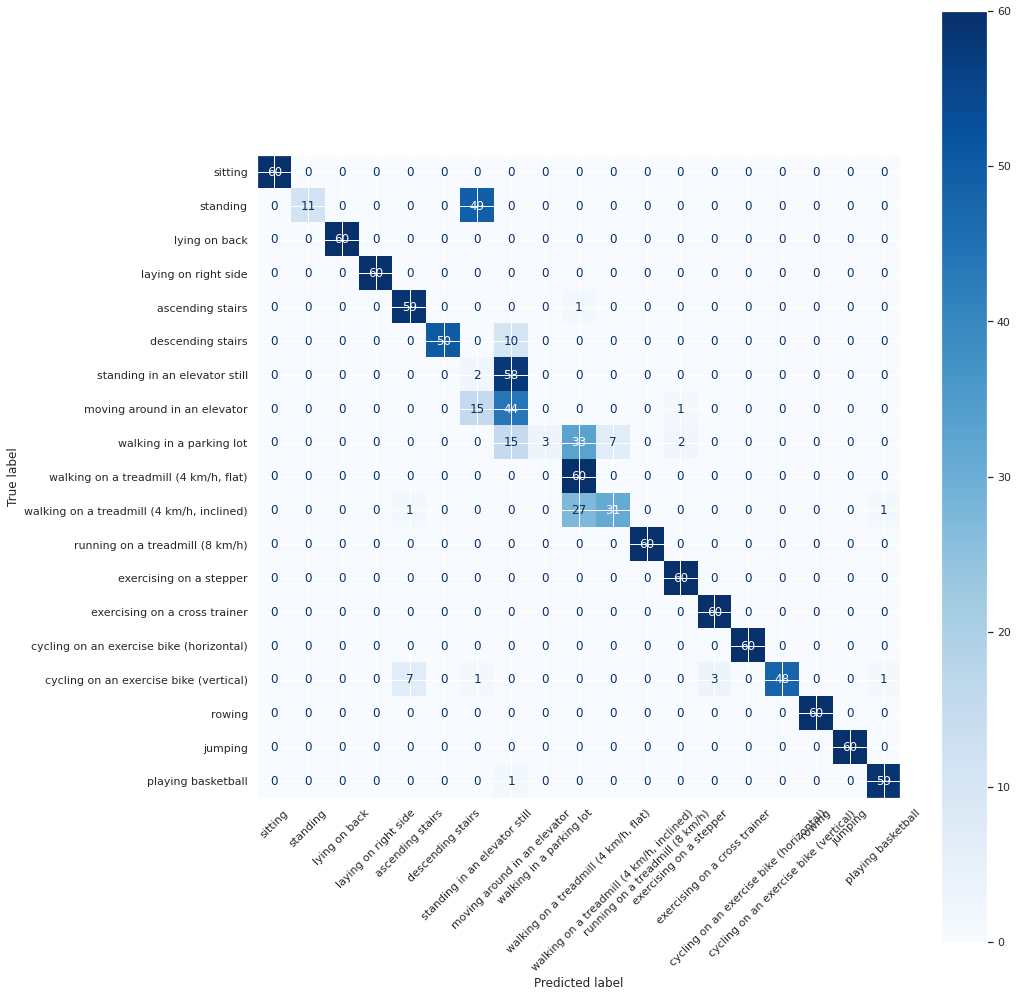

In [125]:
confusion_matrix = confusion_matrix(test_data_output, predictions)
utils.create_confusion_matrix_plot("LR_confusion_matrix.png", confusion_matrix)

To graphically visualize what the meaning of accuracy, the predicted class are shown next to the wrong predicted classes.

Visualise decision boundaries
Performing PCA ...
Done.
Plotting predictions ...


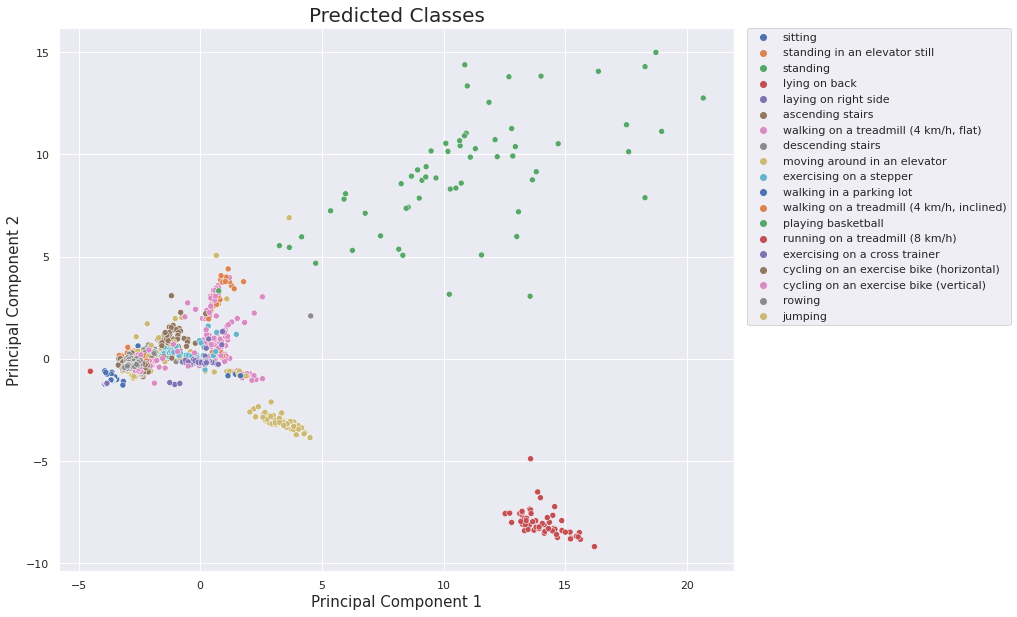

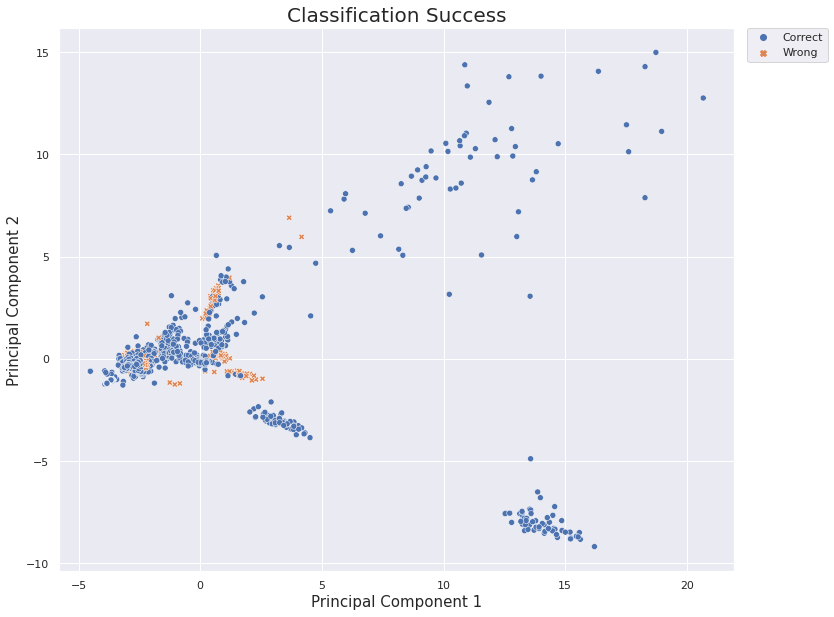

In [126]:
print("Visualise decision boundaries")
print("Performing PCA ...")
principal_components = utils.get_principal_components(test_data_input)
print("Done.")

print("Plotting predictions ...")
utils.create_predictions_scatterplot("LR_predictions_scatterplot.png",
                                     principal_components[:, 0],
                                     principal_components[:, 1],
                                     predictions)

utils.create_prediction_hits_scatterplot("LR_prediction_hits_scatterplot.png",
                                         principal_components[:, 0],
                                         principal_components[:, 1],
                                         test_data_output,
                                         predictions)

## K Nearest Neighbors

K-nearest neighbors is a non-parametric method used for classification and regression. It is one of the most used ML techniques. It is a lazy learning model, with local approximation.

**Advantages**
- Easy and simple machine learning model.
- Few hyperparameters to tune.

**Disadvantages**
- k should be wisely selected.
- Large computation cost during runtime if sample size is large.
- Proper scaling should be provided for fair treatment among features.

**Hyperparameters**
- *K value* : how many neighbors to participate in the KNN algorithm. k should be tuned based on the validation error.
- *Distance function* : in our case, we choose the Minkowski distance because it allows us to work in a N-D space.

As before, from the Scikit Learn library, the algorithm and some evaluation tools are imported.

In [127]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

As stated before, the dataset are imported again and data are elaborated to create fresh data for the model.

In [128]:
print("Importing data ...")

train_data_input, train_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/training_dataset.csv")
    )
test_data_input, test_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/test_dataset.csv")
    )
print("Data imported")

print("Scaling data ...")
scaler = StandardScaler() 
scaler.fit(train_data_input)

train_data_input = scaler.transform(train_data_input)
test_data_input = scaler.transform(test_data_input)
print("Data ready to be used")

Importing data ...
Data imported
Scaling data ...
Data ready to be used


The next step is to train the model. A stopwatch is initialised to gather the training time, as well as at the end the entire running time. The model is imported and the value of *K* is set to 19, since we already know that there are 19 different activities.

In [129]:
print("Training ...")
start_time = time.time()
model = neighbors.KNeighborsClassifier(n_neighbors = 19, metric = 'minkowski', p = 2)
model.fit(train_data_input, train_data_output)
train_time = time.time()
print(f"Model trained: {round(train_time - start_time, utils.DIGITS)} seconds")

Training ...
Model trained: 0.00247 seconds


Once the model is trained, it is fed with the training dataset and used to make some predicitions.

In [130]:
print("Testing ...")
predictions = [int(i) for i in model.predict(test_data_input)]
test_time = time.time()
print(f"Model tested: {round(test_time - train_time, utils.DIGITS)} seconds")

Testing ...
Model tested: 0.29594 seconds


In [131]:
print(f"The overall time required by this model is: "
      f"{round(test_time - start_time, utils.DIGITS)} seconds")

The overall time required by this model is: 0.29841 seconds


The classification report can be easiliy generated. This shows some important performance metrics: particular attention should be paied to the accuracy.

In [132]:
print(classification_report(test_data_output, predictions))

              precision    recall  f1-score   support

         1.0       0.95      1.00      0.98        60
         2.0       0.00      0.00      0.00        60
         3.0       1.00      1.00      1.00        60
         4.0       1.00      1.00      1.00        60
         5.0       0.98      0.98      0.98        60
         6.0       0.95      0.98      0.97        60
         7.0       0.39      0.95      0.56        60
         8.0       0.77      0.28      0.41        60
         9.0       1.00      0.50      0.67        60
        10.0       0.76      1.00      0.86        60
        11.0       0.58      0.70      0.64        60
        12.0       1.00      1.00      1.00        60
        13.0       1.00      1.00      1.00        60
        14.0       0.88      1.00      0.94        60
        15.0       1.00      1.00      1.00        60
        16.0       1.00      0.75      0.86        60
        17.0       1.00      1.00      1.00        60
        18.0       0.98    

Common performance indexes are stored for final comparison.

In [133]:
totalTrainTime.append(round(train_time - start_time, utils.DIGITS))
totalTestTime.append(round(test_time - train_time, utils.DIGITS))
totalAccuracy.append(accuracy_score(test_data_output, predictions))
totalF1ScoreWeighted.append(f1_score(test_data_output, predictions, average = 'weighted'))

As well as the confusion matrix.

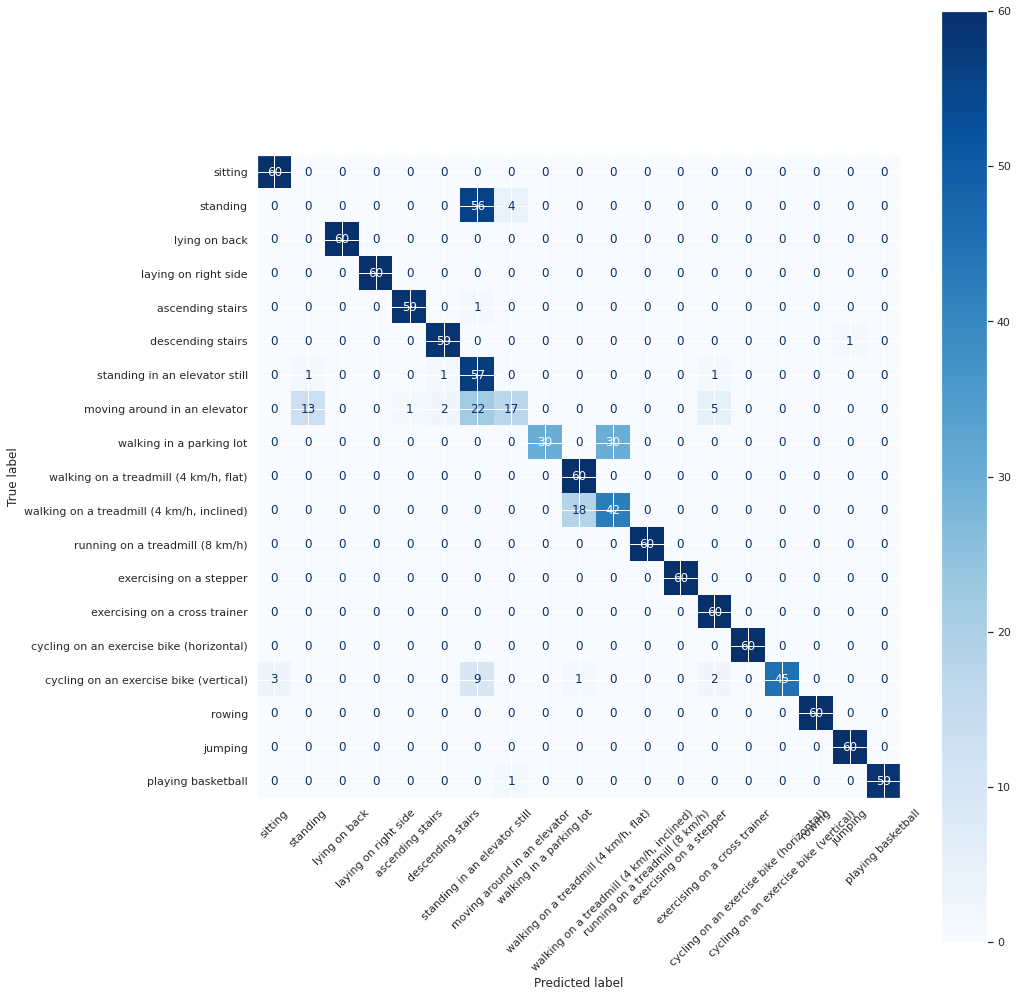

In [134]:
confusion_matrix = confusion_matrix(test_data_output, predictions)
utils.create_confusion_matrix_plot("kNN_confusion_matrix.png", confusion_matrix)

To graphically visualize what the accuracy means, the predicted class are shown next to the wrong predicted classes.

Visualise decision boundaries
Performing PCA ...
Done.
Plotting predictions ...


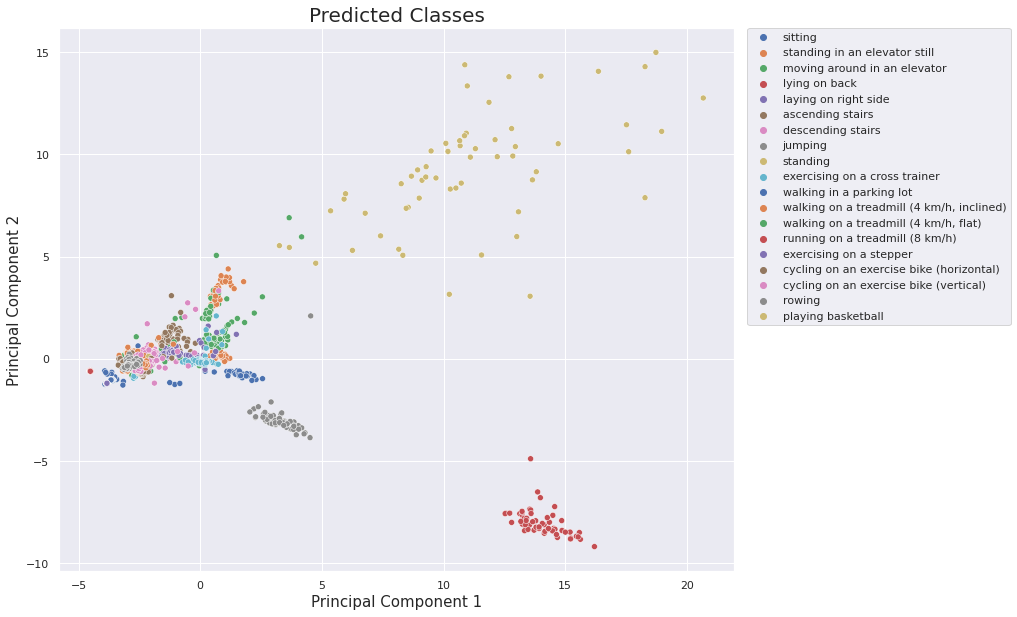

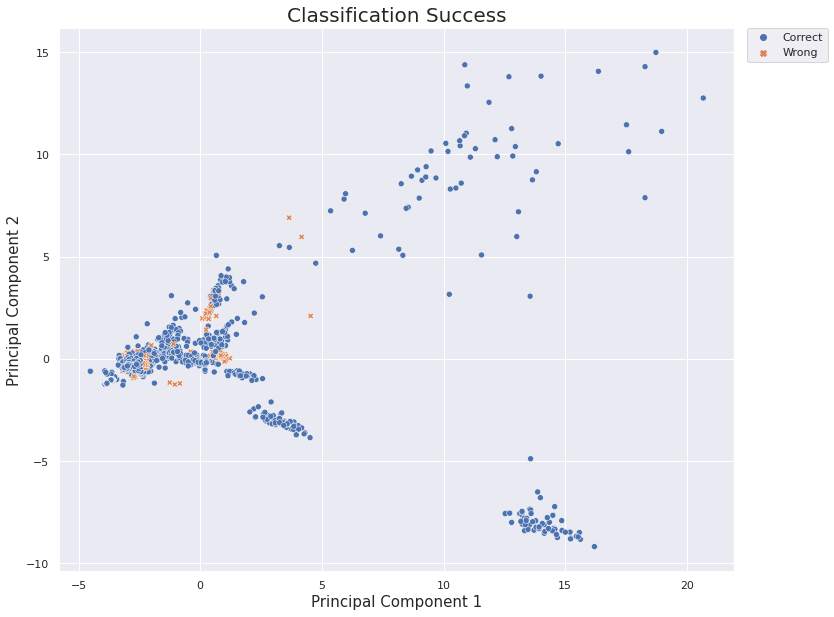

In [135]:
print("Visualise decision boundaries")
print("Performing PCA ...")
principal_components = utils.get_principal_components(test_data_input)
print("Done.")

print("Plotting predictions ...")
utils.create_predictions_scatterplot("kNN_predictions_scatterplot.png",
                                     principal_components[:, 0],
                                     principal_components[:, 1],
                                     predictions)

utils.create_prediction_hits_scatterplot("kNN_prediction_hits_scatterplot.png",
                                         principal_components[:, 0],
                                         principal_components[:, 1],
                                         test_data_output,
                                         predictions)

Cross-validation is primarily used to estimate the skill of a machine learning model on unseen data.

In [136]:
print("Cross validating ...")
knn_cv = neighbors.KNeighborsClassifier(n_neighbors = 19,
                                        metric = 'minkowski',
                                        p = 2)
cv_scores = cross_val_score(knn_cv,
                            train_data_input,
                            train_data_output,
                            cv = utils.CV_FOLDS)
print(f"Considering {utils.CV_FOLDS} randomly created  groups "
      f"and performing the cross validation, the accuracy values "
      f"obtained are: \n {cv_scores}")
print(f"which lead to a mean value of: {round(np.mean(cv_scores), utils.DIGITS)}")

Cross validating ...
Considering 7 randomly created  groups and performing the cross validation, the accuracy values obtained are: 
 [0.91929825 0.89035088 0.87719298 0.88947368 0.82719298 0.89122807
 0.91052632]
which lead to a mean value of: 0.88647


Considering 19 groups, the accuracy value is anyway quite high, but it might not be the optimal value, so the one which lead to the higher accuracy. To find it out, a small operation of hypertuning of model parameters is carried out.

In [137]:
print("Optimising model parameters ...")
knn_opt = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 20)}
print("Parameters grid created")
knn_gscv = GridSearchCV(knn_opt, param_grid, cv = utils.CV_FOLDS)

print("Training the optimal model ...")
knn_gscv.fit(train_data_input, train_data_output)

print("Cross validating the optimal model ...")
print(f"The optimal number of groups is: {knn_gscv.best_params_['n_neighbors']}")
print(f"The accuracy obtained with the best performing "
      f"parameters is: {round(knn_gscv.best_score_, utils.DIGITS)}")

Optimising model parameters ...
Parameters grid created
Training the optimal model ...
Cross validating the optimal model ...
The optimal number of groups is: 18
The accuracy obtained with the best performing parameters is: 0.88722


As seen above, the higher accuracy is given with a value of *K* lower than 20, so let's now have a look at how the error rate, so the mispredicted classes, changes by varying *K*.

Text(0, 0.5, 'Mean Error')

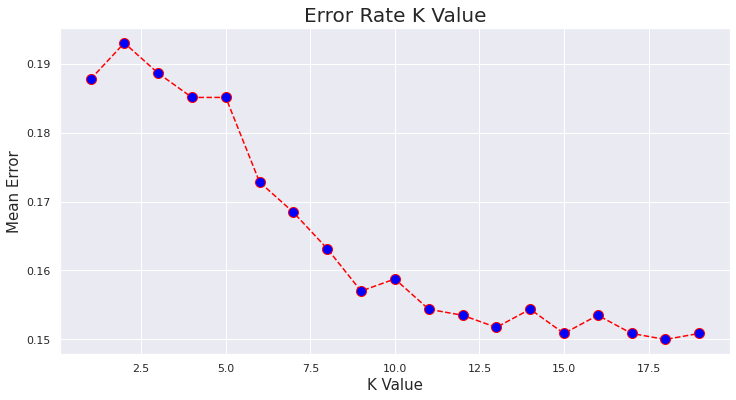

In [138]:
error = []

for i in range(1, 20):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_data_input, train_data_output)
    pred_i = knn.predict(test_data_input)
    error.append(np.mean(pred_i != test_data_output))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value', fontsize = 20)
plt.xlabel('K Value' , fontsize = 15)
plt.ylabel('Mean Error', fontsize = 15)

## Decision Tree

Decision tree is a tree based algorithm used to solve regression and classification problems. An inverted tree is framed which is branched off from a homogeneous probability distributed root node, to highly heterogeneous leaf nodes, for deriving the output.

**Algorithm to select conditions**

For classification trees, *Gini index* or *Entropy index* can be used as classification metric. This lets us calculate how well the datapoints are mixed together.

**Advantages**
- No preprocessing needed on data.
- No assumptions on distribution of data.
- Handles colinearity efficiently.
- Decision trees can provide understandable explanation over the prediction.

**Disadvantages**
- Chances for overfitting the model if we keep on building the tree to achieve high purity. decision tree pruning can be used to solve this issue.
- Prone to outliers.
- Tree may grow to be very complex while training complicated datasets.
- Looses valuable information while handling continuous variables.

**Hyperparameters**
- **criterion** : which cost function for selecting the next tree node. Mostly used ones are gini/entropy.
- **max depth :** it is the maximum allowed depth of the decision tree.
- **minimum samples split :** It is the minimum nodes required to split an internal node.
- **minimum samples leaf :** minimum samples that are required to be at the leaf node.

As before, from the Scikit Learn library, the model and some evaluation tools are imported.

In [139]:
from sklearn import tree, decomposition
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

An additional library is requried to visualize graphically the grown tree.

In [140]:
import pydotplus

As for previous cases, data are imported and elaborated to be ready for feeding the model.

In [141]:
print("Importing data ...")

train_data_input, train_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/training_dataset.csv")
    )
test_data_input, test_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/test_dataset.csv")
    )
print("Data imported")

print("Scaling data ...")
scaler = StandardScaler() 
scaler.fit(train_data_input)

train_data_input = pd.DataFrame(scaler.transform(train_data_input),
                                index=train_data_input.index,
                                columns=train_data_input.columns)
test_data_input = pd.DataFrame(scaler.transform(test_data_input),
                                index=test_data_input.index,
                                columns=test_data_input.columns)

print("Data ready to be used")

Importing data ...
Data imported
Scaling data ...
Data ready to be used


Once data are ready, the model can be trained. The *max_depth*  is set to 19 since the number of differetn activities to recognised is known. The criterion is set ot *entropy* because, even if gini criterion is much faster since it is less computationally expensive, results obtained using the entropy criterion are slightly better.

In [142]:
print("Training ...")
start_time = time.time()
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=19)
model.fit(train_data_input, train_data_output)
train_time = time.time()
print("Model trained:", round(train_time - start_time, utils.DIGITS), "seconds")

Training ...
Model trained: 0.96453 seconds


Now the model is ready to be tested with unseen data.

In [143]:
print("Testing ...")
predictions = [int(i) for i in model.predict(test_data_input)]
test_time = time.time()
print("Model tested:", round(test_time - train_time, utils.DIGITS), "seconds")
print("The overall time reqired by this model is: ", round(test_time - start_time, utils.DIGITS), "seconds")

Testing ...
Model tested: 0.00793 seconds
The overall time reqired by this model is:  0.97247 seconds


Some useful performance metrics are reported below.

In [144]:
print(classification_report(test_data_output, predictions, zero_division=0))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        60
         2.0       1.00      0.02      0.03        60
         3.0       1.00      1.00      1.00        60
         4.0       1.00      1.00      1.00        60
         5.0       0.97      0.55      0.70        60
         6.0       0.00      0.00      0.00        60
         7.0       0.00      0.00      0.00        60
         8.0       0.36      0.68      0.47        60
         9.0       0.57      1.00      0.73        60
        10.0       0.90      0.15      0.26        60
        11.0       0.00      0.00      0.00        60
        12.0       0.98      1.00      0.99        60
        13.0       0.31      0.65      0.42        60
        14.0       0.94      0.97      0.95        60
        15.0       0.97      1.00      0.98        60
        16.0       1.00      0.95      0.97        60
        17.0       1.00      1.00      1.00        60
        18.0       0.97    

Common performance indexes are stored for final comparison.

In [145]:
totalTrainTime.append(round(train_time - start_time, utils.DIGITS))
totalTestTime.append(round(test_time - train_time, utils.DIGITS))
totalAccuracy.append(accuracy_score(test_data_output, predictions))
totalF1ScoreWeighted.append(f1_score(test_data_output, predictions, average = 'weighted'))

Additionally, a brief look at the confusion matrix for this model can be given.

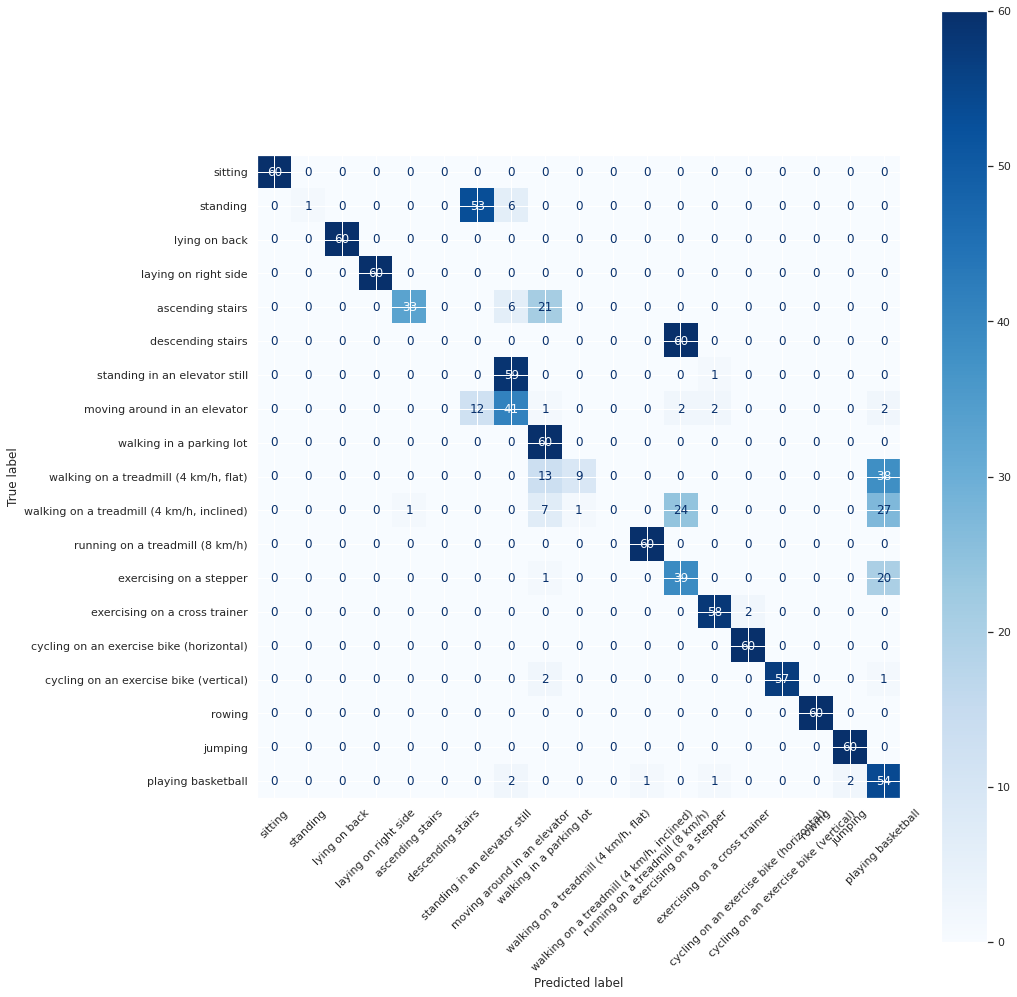

In [146]:
confusion_matrix = confusion_matrix(test_data_output, predictions)
utils.create_confusion_matrix_plot("DT_confusion_matrix.png", confusion_matrix)

Since the grown tree might be complex and wide (as in this case), it is particularly useful to save it so that a picture can be further analysed.

In [147]:
print("Exporting the tree ...")
dec_tree_data = tree.export_graphviz(model,
                                     feature_names=train_data_input.columns,
                                     class_names=utils.ACTIVITIES,
                                     filled=True,
                                     out_file=None)
graph = pydotplus.graph_from_dot_data(dec_tree_data)
graph.write_png(os.path.join(utils.PLOT_DIRECTORY, "DT_structure.png"))
print('Tree saved as PNG')

Exporting the tree ...
Tree saved as PNG


Decison boundaries and misclassified datapoints are shown below.

Visualise decision boundaries
Performing PCA ...
Done
Plotting predictions ...


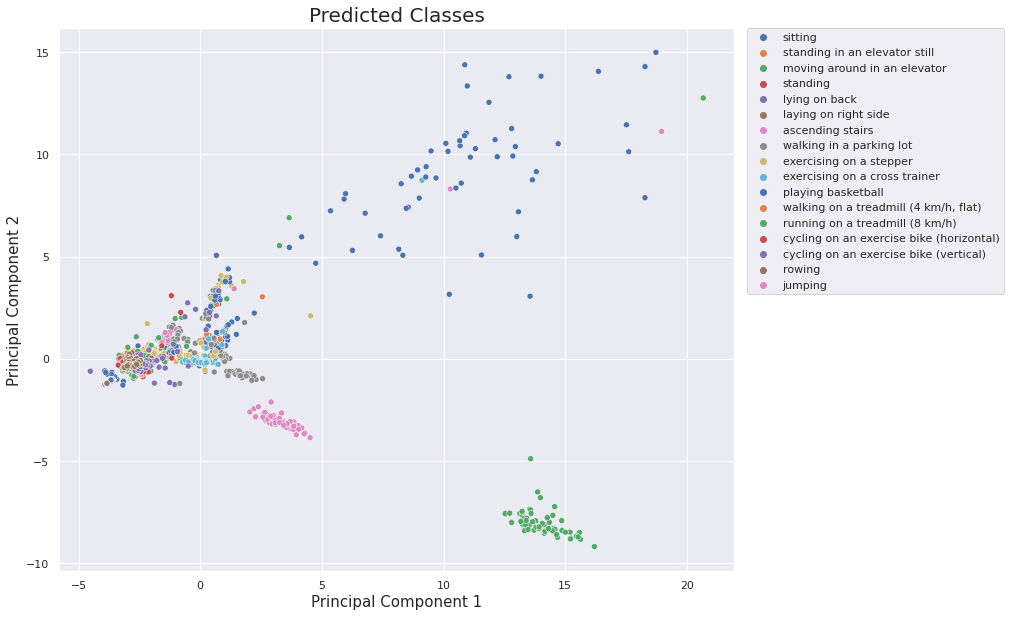

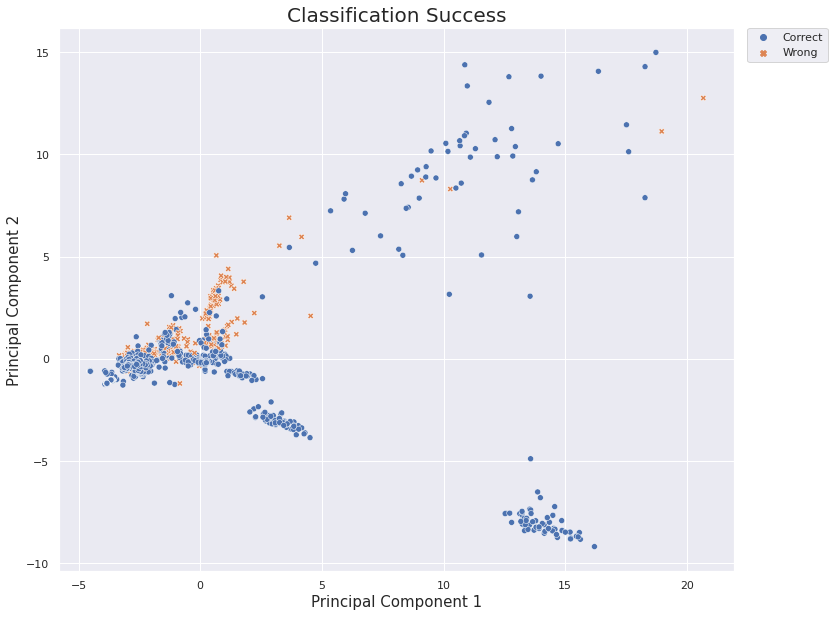

In [148]:
print("Visualise decision boundaries")
print("Performing PCA ...")
principal_components = utils.get_principal_components(test_data_input)
print("Done")

print("Plotting predictions ...")
utils.create_predictions_scatterplot("LR_predictions_scatterplot.png",
                                     principal_components[:, 0],
                                     principal_components[:, 1],
                                     predictions)

utils.create_prediction_hits_scatterplot("LR_prediction_hits_scatterplot.png",
                                         principal_components[:, 0],
                                         principal_components[:, 1],
                                         test_data_output,
                                         predictions)

Again, to see how the model performs whenn unseen data are give, cross-validation is performed.

In [149]:
print("Cross Validation")
dt_cv = tree.DecisionTreeClassifier(criterion='entropy', max_depth=19)
cv_scores = cross_val_score(dt_cv, train_data_input, train_data_output, cv=utils.CV_FOLDS)
print(f"Considering {utils.CV_FOLDS} randomly created groups and performing "
      f"the cross validation, the accuracy values obtained are:\n {cv_scores}")
print(f"which lead to a mean value of: {round(np.mean(cv_scores), utils.DIGITS)}")

Cross Validation
Considering 7 randomly created groups and performing the cross validation, the accuracy values obtained are:
 [0.68333333 0.73333333 0.81754386 0.77017544 0.6745614  0.8877193
 0.74122807]
which lead to a mean value of: 0.75827


To improve the accuracy, the hyperparameter can be fine tuned.

Optimising model parameters ...


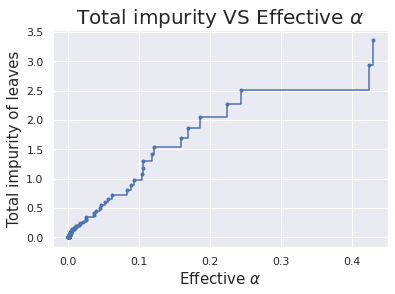

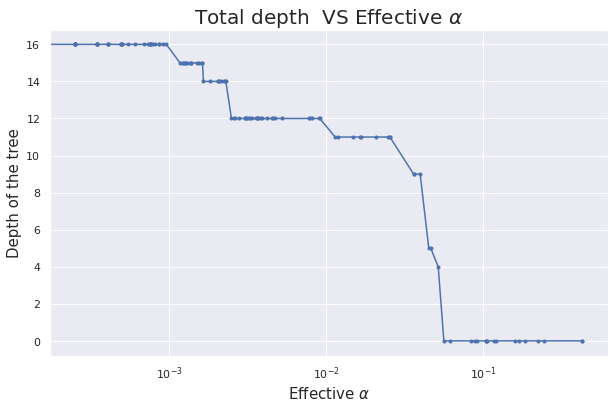

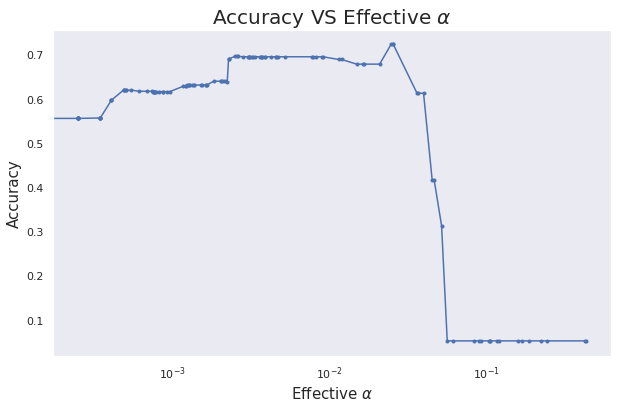

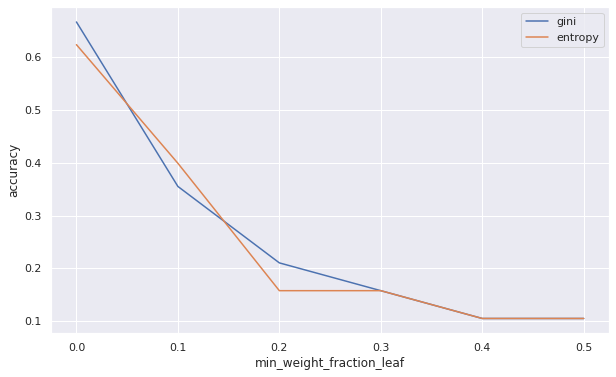

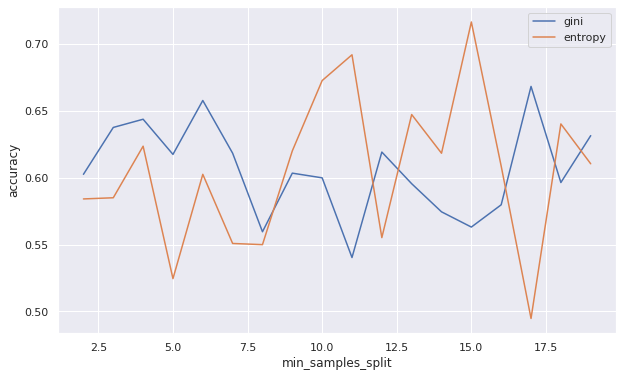

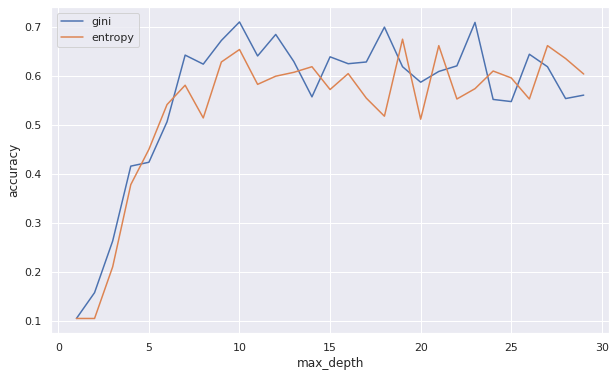

In [150]:
print("Optimising model parameters ...")

# optimizing using effective alpha
path = model.cost_complexity_pruning_path(train_data_input, train_data_output)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    dec_tree_opt = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dec_tree_opt.fit(train_data_input, train_data_output)
    clfs.append(dec_tree_opt)

# plotting
utils.create_impurity_vs_alpha_plot("DT_impurity_vs_alpha.png", impurities, ccp_alphas)

tree_depths = [dec_tree_opt.tree_.max_depth for dec_tree_opt in clfs]
utils.create_depth_vs_alpha_plot("DT_depth_vs_alpha.png", tree_depths, ccp_alphas)

acc_scores = [accuracy_score(test_data_output, dec_tree_opt.predict(test_data_input)) for dec_tree_opt in clfs]
utils.create_accuracy_vs_alpha_plot("DT_accuracy_vs_alpha.png", acc_scores, ccp_alphas)

# optimizing using different parameters
params = {"min_weight_fraction_leaf": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
          "min_samples_split": range(2, 20, 1),
          "max_depth": range(1, 30)}

for param, param_values in params.items():
    accuracies = utils.get_parametrized_decision_tree_accuracies(
        param, param_values,
        train_data_input, train_data_output,
        test_data_input, test_data_output
    )

    data = pd.DataFrame({'acc_gini': pd.Series(accuracies["acc_gini"]),
                         'acc_entropy': pd.Series(accuracies["acc_entropy"]),
                         param: pd.Series(param_values)})

    utils.create_param_accuracy_plot(f"DT_{param}_acc.png",
                                     param,data)

## Multilayer Perceptron

Multi layer perceptron is a supplement of feed forward neural network. It consists of three types of layers:
1. input layer
2. output layer
3. hidden layer

Similar to a feed forward network in a MLP the data flows in the forward direction from input to output layer. The neurons in the MLP are trained with the back propagation learning algorithm. The major use cases of MLP are pattern classification, recognition, prediction and approximation.

**Advantages**
- Can be applied to complex non-linear problems.
- Work well with large input data.
- Provide quick prediction after training.
- Same accuracy can be achieved even with smaller data.

**Disadvantages**
- It is unknown at which extent each independent variable is affected by the dependent one.
- Computations are difficult and time consuming, especially during training.
- The proper functioning of the model depends on the quality of the training.

**Hyperparameters**
- **number of hidden layers**: amount of layers between input layer and output layer.
- **number of units for each hidden layer**: many hidden units within a layer with regularization techniques can increase accuracy. Smaller number of units may cause underfitting.
- **learning rate**: how quickly a network updates its parameters. Low learning rate slows down the learning process but converges smoothly. Larger learning rate speeds up the learning but may not converge.
- **layer activation function**: it is used to introduce non-linearity to models, which allows deep learning models to learn non-linear prediction boundaries.

As before, from the Scikit Learn library, some evaluation tools are imported.

In [151]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler

In this case, the neural network is created using the python library Keras, so it must be imported.

In [152]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

As stated before, the dataset are imported again and data are elaborated to create fresh data for the model.

In [153]:
print("Importing data ...")

train_data_input, train_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/training_dataset.csv")
    )
test_data_input, test_data_output = \
    utils.get_splitted_dataset(os.path.join(os.getcwd(),"sports_dataset/test_dataset.csv")
    )
print("Data imported")

print("Scaling data ...")
scaler = StandardScaler() 
scaler.fit(train_data_input)

train_data_input = scaler.transform(train_data_input)
test_data_input = scaler.transform(test_data_input)
print("Data ready to be used")

Importing data ...
Data imported
Scaling data ...
Data ready to be used


In addition to the data retrieved from the dataset, some dummy data are required.

In [154]:
print("Creating dummy data ...")
train_data_output_dummy = \
    pd.get_dummies(train_data_output).rename(columns=lambda x: 'Category_' + str(x))
test_data_output_dummy = \
    pd.get_dummies(test_data_output).rename(columns=lambda x: 'Category_' + str(x))
print("Dummy data ready")

Creating dummy data ...
Dummy data ready


Now, the model is ready for training.

In [155]:
print("Training ...")
start_time = time.time()

model = Sequential()
model.add(Dense(units = 10,
                kernel_initializer = 'uniform',
                activation = 'relu',
                input_dim = 90))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 10,
                kernel_initializer = 'uniform',
                activation = 'relu',
                input_dim = 10))
model.add(Dropout(rate = 0.2))
model.add(Dense(units = 19,
                kernel_initializer = 'uniform',
                activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(train_data_input, train_data_output_dummy, batch_size = 64, epochs = 300, verbose=0)

train_time = time.time()

Training ...


In [156]:
print(f"Model trained: {round(train_time - start_time, utils.DIGITS)} seconds")

Model trained: 33.53006 seconds


Then, let's test the model.

In [157]:
print("Testing...")
accuracy = model.evaluate(test_data_input, test_data_output_dummy)[1]
predictions = model.predict(test_data_input, verbose=1).argmax(axis=-1) + 1
test_time = time.time()
print(f"Model tested: {round(test_time - train_time, utils.DIGITS)} seconds")

print(f"The overall time required by this model is: "
      f"{round(test_time - start_time, utils.DIGITS)} seconds")

Testing...
36/36 [==============================] - 0s 665us/step
Model tested: 0.2279 seconds
The overall time required by this model is: 33.75796 seconds


As before, some performance metrics can be shown.

In [158]:
print(classification_report(test_data_output, predictions, zero_division=0))

              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97        60
         2.0       0.00      0.00      0.00        60
         3.0       1.00      1.00      1.00        60
         4.0       0.85      1.00      0.92        60
         5.0       0.97      0.47      0.63        60
         6.0       0.52      0.62      0.56        60
         7.0       0.50      0.05      0.09        60
         8.0       0.21      0.62      0.31        60
         9.0       0.00      0.00      0.00        60
        10.0       0.41      1.00      0.58        60
        11.0       0.22      0.15      0.18        60
        12.0       0.95      1.00      0.98        60
        13.0       0.94      0.80      0.86        60
        14.0       0.95      1.00      0.98        60
        15.0       0.94      1.00      0.97        60
        16.0       0.98      0.67      0.79        60
        17.0       1.00      1.00      1.00        60
        18.0       0.85    

Common performance indexes are stored for final comparison.

In [159]:
totalTrainTime.append(round(train_time - start_time, utils.DIGITS))
totalTestTime.append(round(test_time - train_time, utils.DIGITS))
totalAccuracy.append(accuracy_score(test_data_output, predictions))
totalF1ScoreWeighted.append(f1_score(test_data_output, predictions, average = 'weighted'))

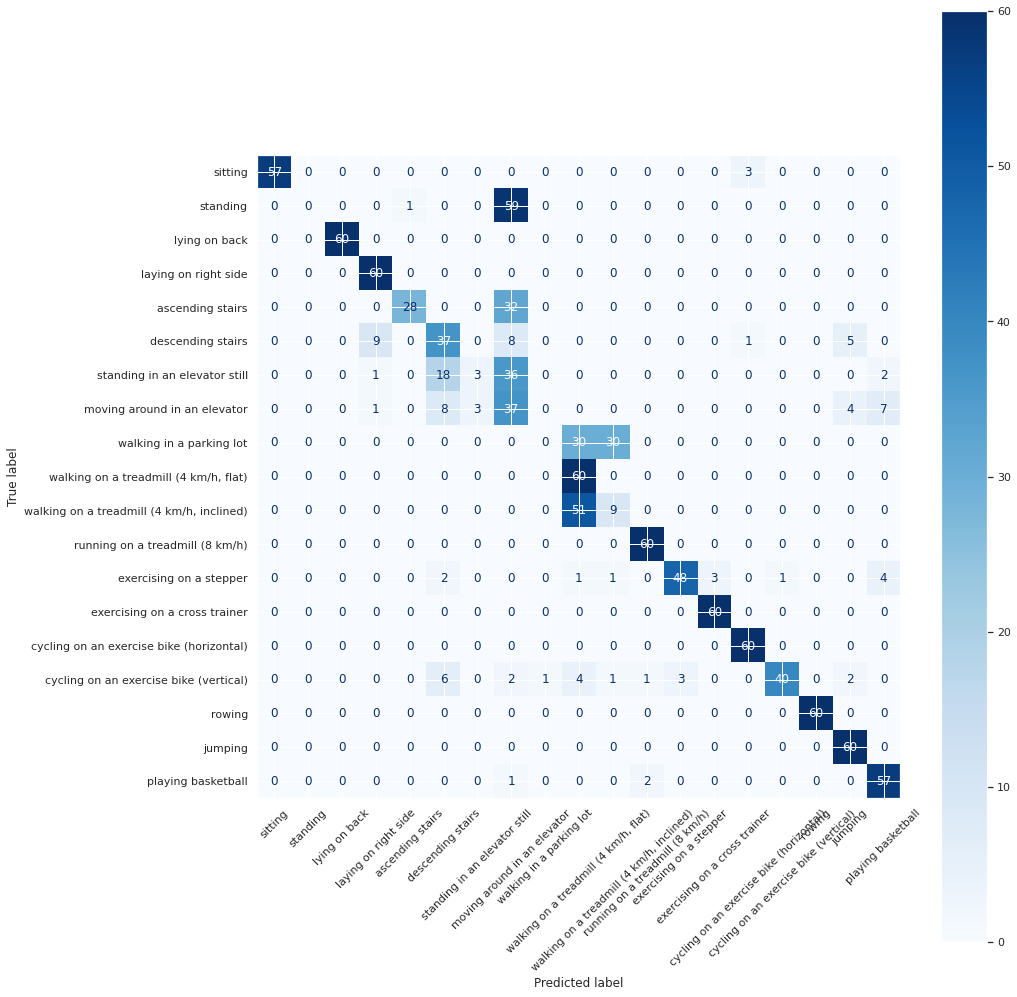

In [160]:
confusion_matrix = confusion_matrix(test_data_output, predictions)
utils.create_confusion_matrix_plot("MLP_confusion_matrix.png", confusion_matrix)

As well as the misclassified datapoints.

Visualise decision boundaries
Performing PCA ...
Done.
Plotting predictions ...


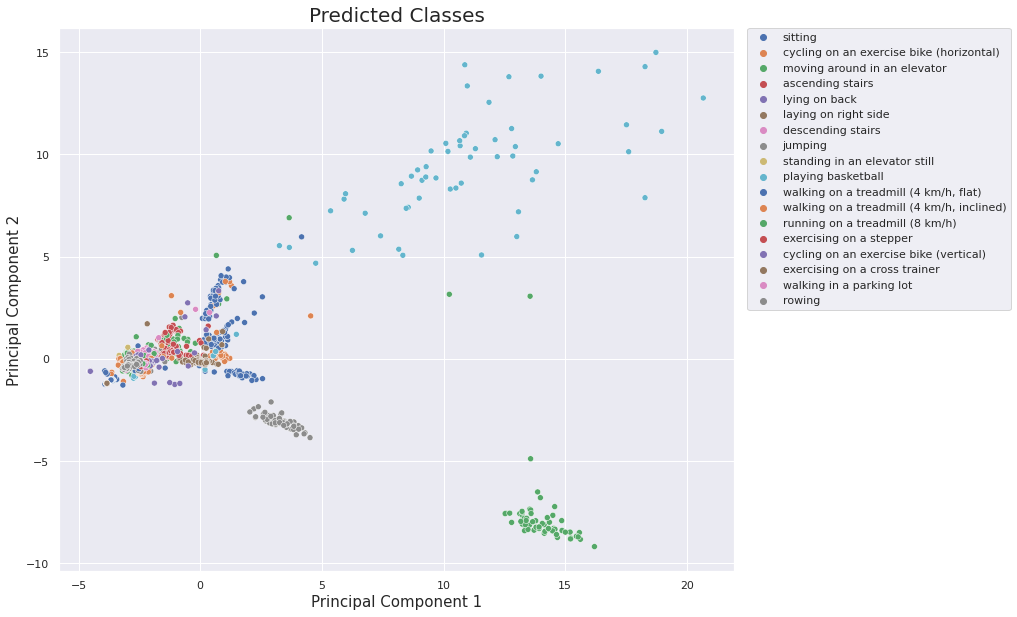

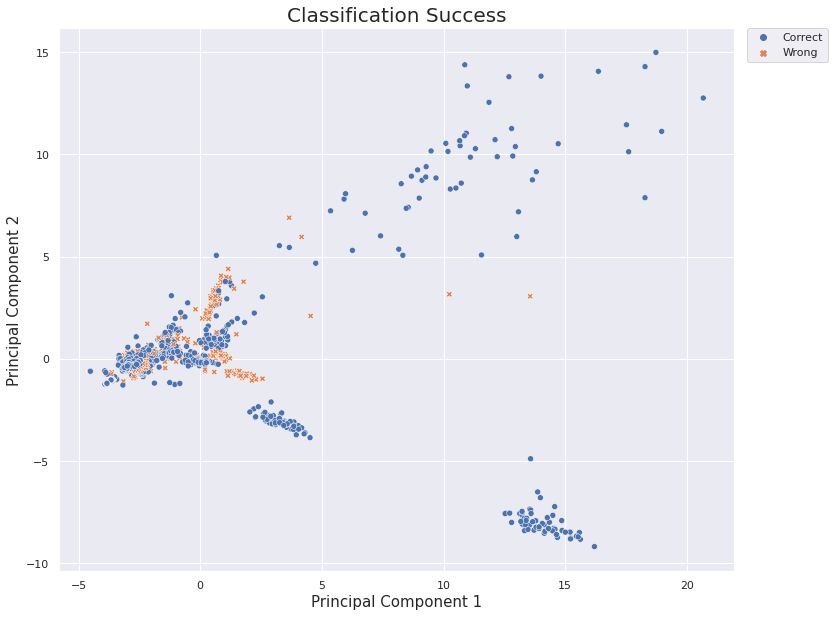

In [161]:
print("Visualise decision boundaries")
print("Performing PCA ...")
principal_components = utils.get_principal_components(test_data_input)
print("Done.")

print("Plotting predictions ...")
utils.create_predictions_scatterplot("MLP_predictions_scatterplot.png",
                                     principal_components[:, 0],
                                     principal_components[:, 1],
                                     predictions)

utils.create_prediction_hits_scatterplot("MLP_prediction_hits_scatterplot.png",
                                         principal_components[:, 0],
                                         principal_components[:, 1],
                                         test_data_output,
                                         predictions)

## Comparison Between Models and Final Considerations

In this paragraph, some considerations about performances and effectiveness are reported with the aim of undestranting the best working conditions for each model.

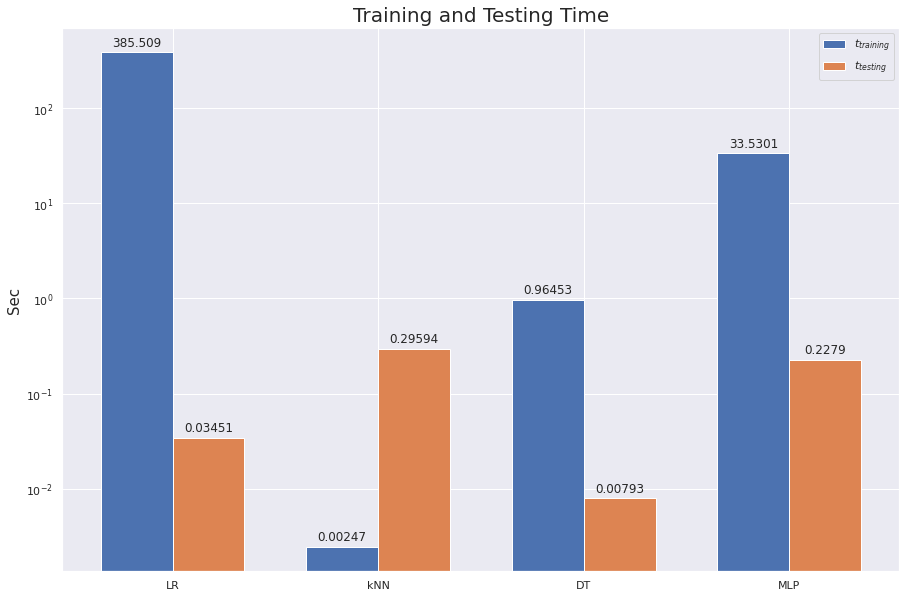

In [162]:
labels = ['LR', 'kNN', 'DT', 'MLP']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(15, 10))
rects1 = plt.bar(x - width/2, totalTrainTime, width, label='$t_{training}$')
rects2 = plt.bar(x + width/2, totalTestTime, width, label='$t_{testing}$')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Sec', fontsize = 15)
plt.title('Training and Testing Time', fontsize = 20)
plt.xticks(x, labels)
plt.legend()

plt.bar_label(rects1, padding=3)
plt.bar_label(rects2, padding=3)

plt.yscale("log")

fig.tight_layout()

plt.show()

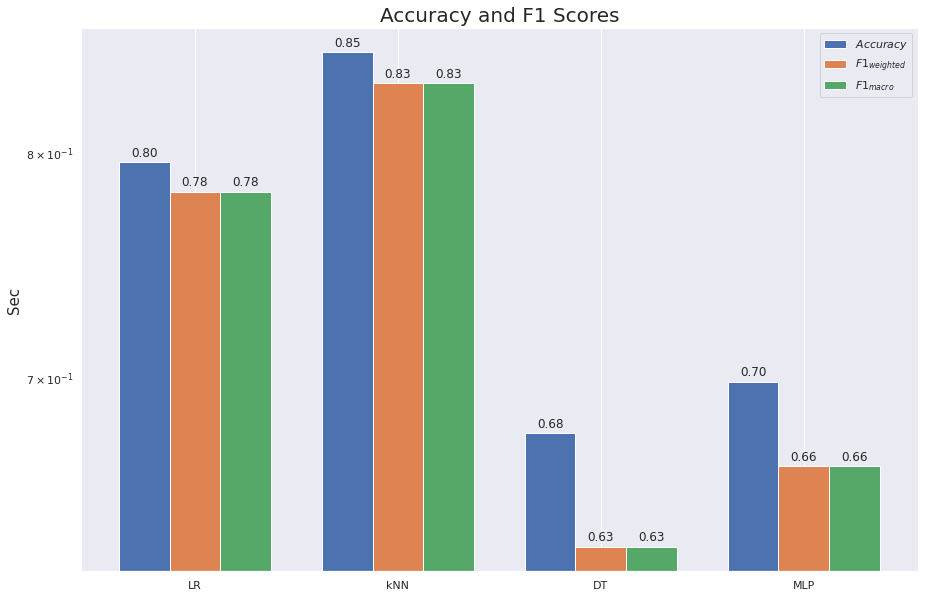

In [180]:
labels = ['LR', 'kNN', 'DT', 'MLP']
x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

plt.figure(figsize=(15, 10))
rects1 = plt.bar(x - width, totalAccuracy, width, label='$Accuracy$')
rects2 = plt.bar(x, totalF1ScoreWeighted, width, label='$F1_{weighted}$')

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('Sec', fontsize = 15)
plt.title('Accuracy and F1 Scores', fontsize = 20)
plt.xticks(x, labels)
plt.legend()

plt.bar_label(rects1, padding = 3, fmt='%.2f')
plt.bar_label(rects2, padding = 3, fmt='%.2f')

plt.yscale("log")

fig.tight_layout()

plt.show()

Logistic regression has a convex loss function, so it won't hang in a local minima, whereas for example neaural network may. One important thing to consider is that logistic regression outperforms neural network when training data is less and features are large, since neural networks need large training data. Of course there is a strike also for neural networks since they can support non-linear solutions where for example logistic regression can not. 
Talking about time consumption, KNN is comparatively slower than other competitors like logistic regression and decision trees, but it supports non-linear solutions too. One major downgrade is that, KNN can only output the labels. Lukily, KNN requires less data to achieve a sufficient accuracy respect to neural networks, but it needs lot of hyperparameter tuning compared to KNN.
Finally, let's spend some workd about decision trees. In general, they handle colinearity better, but can not derive the significance of features, hence they are better for a categorical evaluation. Respect to KNN, decision tree supports automatic feature interaction, and it is faster due to KNN’s expensive real time execution. Decision trees perform better when there is a large set of categorical values in the training data. In comparison to neural networks, decision trees are better suited when the scenario demands an explanation over the decision, but when there is sufficient training data, neural networks outperfomr drastically decision trees.

## Students

- Galli Davide - 15233
- Papousek Jiri - Erasmus student

## References

- [Comparative Study on Classic Machine learning Algorithms](https://towardsdatascience.com/comparative-study-on-classic-machine-learning-algorithms-24f9ff6ab222)
- [Daily and Sports Activities Dataset](https://archive-beta.ics.uci.edu/ml/datasets/daily+and+sports+activities)
- [Scikit Learn Python Library](https://scikit-learn.org/stable/)
- [Keras Python Library](https://keras.io/)
- [Project GitHub Repository](https://github.com/d-galli/SportActivitiesClassification)